# Biomedical Data Science - LAB 04
Group members:

· Enrico Maria Marinelli

· Francesco Pio Capoccello

· Juras LukaŠevičius

###Import

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neural_network as nn
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras as tfk
from keras import layers as tfkl
import json
import pickle
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import HTML
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr
import regex as re

In [165]:
df=pd.read_csv("inadvance_synth.csv",sep=";")

###Block 1 - Data loading and basic description

1. What is the size of the dataframe?

In [166]:
df = df.drop(df.columns[0], axis=1)

In [167]:
df.shape


(38416, 21)

 2. What is the mean age?

In [168]:
mean = df.age.mean()
print(mean)

79.4033215326947


3. What is the age standard deviation (std)?

In [169]:
std=df.age.std()
print(std)

8.361737254115944


4. Which is the variable with the most amount of missing values? Can you list the name of the variables, sorting them by number of missing values?

In [170]:
nullvalues = df.isnull().sum()
features_ordinate = nullvalues.sort_values(ascending=False)
print(features_ordinate)

barthel                28198
num_grupoact3_HOSP     21001
proteina_c_reactiva    18175
urea                   14260
codidiagingreso        11378
glucosa                 9228
potasio                 8646
rdw_sd                  8334
rdw_cv                  8334
hematocrito             8302
leucocitos              8302
sodio                   8142
creatinina              7951
drg                     3640
numurgenciasprevias      552
metastatic_tumor          77
charlson                  77
age                        0
estancias                  0
codservicioreal            0
label                      0
dtype: int64


5. Name which are the categorical variables.

In [171]:
df['metastatic_tumor'] = df['metastatic_tumor'].astype('object')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38416 non-null  int64  
 1   barthel              10218 non-null  float64
 2   charlson             38339 non-null  float64
 3   codidiagingreso      27038 non-null  object 
 4   codservicioreal      38416 non-null  object 
 5   creatinina           30465 non-null  float64
 6   drg                  34776 non-null  float64
 7   estancias            38416 non-null  float64
 8   glucosa              29188 non-null  float64
 9   hematocrito          30114 non-null  float64
 10  leucocitos           30114 non-null  float64
 11  metastatic_tumor     38339 non-null  object 
 12  num_grupoact3_HOSP   17415 non-null  float64
 13  numurgenciasprevias  37864 non-null  float64
 14  potasio              29770 non-null  float64
 15  proteina_c_reactiva  20241 non-null 

In [173]:
categoric_variables = df.select_dtypes(include=['object'])
print(categoric_variables.columns.tolist())

['codidiagingreso', 'codservicioreal', 'metastatic_tumor']


In [174]:
df['label'].value_counts(ascending=True)

1.0    13431
0.0    24985
Name: label, dtype: int64

###Block 2

#####Question 1

In [175]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
X_train.head(2)

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,leucocitos,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea
29147,65,NaN,1.0,780.2,HCAR,0.76,171.0,4.0,91.0,38.148684,2.64,0.0,NaN,1.0,4.353334,NaN,12.8,38.5,140.0,25.352822
10512,67,NaN,1.0,NaN,HNEM,0.86,139.0,5.0,150.6,41.548684,11.66,0.0,3.0,1.0,4.563334,53.980658,14.9,47.7,139.0,33.652822


In [177]:
X_train.shape

(30732, 20)

In [178]:
X_test.head(2)

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,leucocitos,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea
36169,75,NaN,5.0,NaN,HCAR,1.76,192.0,7.0,137.3,42.848684,8.99,0.0,17.0,4.0,3.803334,NaN,13.2,43.3,142.0,73.052822
13759,85,NaN,9.0,NaN,HNER,0.91,45.0,6.0,93.5,40.748684,6.73,1.0,3.0,2.0,4.463334,4.580658,13.6,44.3,140.0,NaN


In [179]:
X_test.shape

(7684, 20)

In [180]:
X_train.isnull().sum()

age                        0
barthel                22510
charlson                  59
codidiagingreso         9131
codservicioreal            0
creatinina              6322
drg                     2891
estancias                  0
glucosa                 7360
hematocrito             6588
leucocitos              6588
metastatic_tumor          59
num_grupoact3_HOSP     16768
numurgenciasprevias      448
potasio                 6872
proteina_c_reactiva    14522
rdw_cv                  6612
rdw_sd                  6612
sodio                   6463
urea                   11344
dtype: int64

In [181]:
X_test.isnull().sum()

age                       0
barthel                5688
charlson                 18
codidiagingreso        2247
codservicioreal           0
creatinina             1629
drg                     749
estancias                 0
glucosa                1868
hematocrito            1714
leucocitos             1714
metastatic_tumor         18
num_grupoact3_HOSP     4233
numurgenciasprevias     104
potasio                1774
proteina_c_reactiva    3653
rdw_cv                 1722
rdw_sd                 1722
sodio                  1679
urea                   2916
dtype: int64

####Question2: Categoric Variables

In [182]:
categoric_variables = X_train.select_dtypes(include=['object'])
print(categoric_variables.columns.tolist())

['codidiagingreso', 'codservicioreal', 'metastatic_tumor']


#####codidiagingreso

In [183]:
countTrain = X_train['codidiagingreso'].value_counts()
countTest = X_test['codidiagingreso'].value_counts()

In [184]:
print(countTrain)

401.9     2158
518.81     503
486        432
250.00     410
414.9      397
          ... 
459.2        1
294.9        1
334.4        1
V44.4        1
692.82       1
Name: codidiagingreso, Length: 1872, dtype: int64


In [185]:
print(countTest)

401.9     576
518.81    140
250.00    122
414.9     114
486       101
         ... 
275.42      1
V15.81      1
599.1       1
516.36      1
453.51      1
Name: codidiagingreso, Length: 1010, dtype: int64


In [186]:
median_train = X_train['codidiagingreso'].apply(pd.to_numeric, errors='coerce').median()

X_train['codidiagingreso'].fillna(mediana_train, inplace=True)

In [187]:
median_test = X_test['codidiagingreso'].apply(pd.to_numeric, errors='coerce').median()

X_test['codidiagingreso'].fillna(mediana_test, inplace=True)

In [188]:
X_train['codidiagingreso'].isnull().sum()

0

In [189]:
X_test['codidiagingreso'].isnull().sum()

0

In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30732 entries, 29147 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30732 non-null  int64  
 1   barthel              8222 non-null   float64
 2   charlson             30673 non-null  float64
 3   codidiagingreso      30732 non-null  object 
 4   codservicioreal      30732 non-null  object 
 5   creatinina           24410 non-null  float64
 6   drg                  27841 non-null  float64
 7   estancias            30732 non-null  float64
 8   glucosa              23372 non-null  float64
 9   hematocrito          24144 non-null  float64
 10  leucocitos           24144 non-null  float64
 11  metastatic_tumor     30673 non-null  object 
 12  num_grupoact3_HOSP   13964 non-null  float64
 13  numurgenciasprevias  30284 non-null  float64
 14  potasio              23860 non-null  float64
 15  proteina_c_reactiva  16210 non-n

In [191]:
X_train.head(20)

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,leucocitos,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea
29147,65,NaN,1.0,780.2,HCAR,0.76,171.0,4.0,91.0,38.148684,2.64,0.0,NaN,1.0,4.353334,NaN,12.80000,38.500000,140.000000,25.352822
10512,67,NaN,1.0,434.01,HNEM,0.86,139.0,5.0,150.6,41.548684,11.66,0.0,3.0,1.0,4.563334,53.980658,14.90000,47.700000,139.000000,33.652822
32039,94,NaN,9.0,585.9,HMUR,0.80,425.0,4.0,73.7,30.948684,6.45,0.0,NaN,2.0,4.483334,NaN,14.90000,46.800000,137.000000,30.852822
17925,83,95.0,3.0,428.1,HCAR,1.28,198.0,3.0,96.0,35.710714,9.63,0.0,NaN,7.0,4.700000,NaN,14.56075,50.123099,138.340418,65.253918
16317,81,NaN,2.0,558.9,HMUR,0.58,249.0,3.0,79.9,42.548684,6.51,0.0,NaN,1.0,3.023334,6.360658,19.50000,52.300000,144.000000,23.652822
13471,78,NaN,0.0,574.90,HUHP,0.65,260.0,8.0,94.8,35.648684,4.59,0.0,3.0,4.0,3.983334,NaN,14.70000,48.900000,142.000000,22.252822
7937,86,NaN,0.0,401.9,HNEM,1.02,144.0,3.0,119.5,33.448684,5.85,0.0,NaN,1.0,4.333334,43.390658,13.00000,45.100000,143.000000,47.152822
35531,87,75.0,8.0,434.01,HMDG,0.99,253.0,7.0,192.4,25.848684,5.00,0.0,17.0,12.0,4.083334,-2.999342,17.70000,61.200000,137.000000,NaN
6921,91,NaN,1.0,438.20,HNCG,0.84,56.0,12.0,155.2,37.310714,7.91,0.0,NaN,1.0,3.230000,12.347684,15.06075,45.423099,142.340418,44.153918
25147,92,NaN,6.0,518.84,HNEM,0.60,133.0,6.0,172.9,36.010714,5.82,0.0,NaN,1.0,4.970000,2.647684,15.66075,52.423099,139.340418,64.253918


 We use the function pd.to_numeric() to attempt to convert the values in the "codidiagingreso" column to numbers. The errors='coerce' option causes non-numeric values to be replaced with NaN (Not a Number) during the conversion. At the end of this operation, we get a Series of numeric values and NaN.

After converting the values to numbers (and replacing the non-numeric values with NaN), we calculate the median of this Series. The median is calculated by ignoring NaN values, so you get the median only from the valid numeric values in the "codidiagingreso" column.
At the end we use the value found in the median to fill in the training and test null values with the median value calculated in the previous step.

#####metastatic_tumor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

k_values = list(range(1, 21))


mean_scores = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = imputer.fit_transform(X_train[['metastatic_tumor']])


    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, imputed_data, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))


best_k = k_values[np.argmin(mean_scores)]
print("The best number of neighbors is", best_k)



In summary, the code performs a search for the best value of k for a KNN-based regression model. It uses cross-validation to evaluate the performance of the model on training data and determine which number of neighbors gives the best result in terms of mean square error. The process helps select an optimal k value for the KNN model based on the data provided.

In [192]:
from sklearn.impute import KNNImputer

imputer_train = KNNImputer(n_neighbors=1)
imputer_test = KNNImputer(n_neighbors=1)


metastatic_tumor_train_imputed = imputer_train.fit_transform(X_train[['metastatic_tumor']])
X_train['metastatic_tumor'] = metastatic_tumor_train_imputed

metastatic_tumor_test_imputed = imputer_test.fit_transform(X_test[['metastatic_tumor']])
X_test['metastatic_tumor'] = metastatic_tumor_test_imputed

In this part, imputer_train and imputer_test are two separate objects of KNNImputer. imputer_train is used to train and impute data in the training set, while imputer_test is used to train and impute data in the test set.

This ensures that two separate imputation models are used for the two data sets while maintaining the diversity between the imputations in the two sets.

In [193]:
X_train.isnull().sum()

age                        0
barthel                22510
charlson                  59
codidiagingreso            0
codservicioreal            0
creatinina              6322
drg                     2891
estancias                  0
glucosa                 7360
hematocrito             6588
leucocitos              6588
metastatic_tumor           0
num_grupoact3_HOSP     16768
numurgenciasprevias      448
potasio                 6872
proteina_c_reactiva    14522
rdw_cv                  6612
rdw_sd                  6612
sodio                   6463
urea                   11344
dtype: int64

In [194]:
X_train['metastatic_tumor'] = X_train['metastatic_tumor'].replace({0.0: 'negativo', 1.0: 'positivo'})
X_test['metastatic_tumor'] = X_test['metastatic_tumor'].replace({0.0: 'negativo', 1.0: 'positivo'})

In [195]:
X_train.head(10)

,age,barthel,charlson,codidiagingreso,codservicioreal,creatinina,drg,estancias,glucosa,hematocrito,leucocitos,metastatic_tumor,num_grupoact3_HOSP,numurgenciasprevias,potasio,proteina_c_reactiva,rdw_cv,rdw_sd,sodio,urea
29147,65,NaN,1.0,780.2,HCAR,0.76,171.0,4.0,91.0,38.148684,2.64,negativo,NaN,1.0,4.353334,NaN,12.80000,38.500000,140.000000,25.352822
10512,67,NaN,1.0,434.01,HNEM,0.86,139.0,5.0,150.6,41.548684,11.66,negativo,3.0,1.0,4.563334,53.980658,14.90000,47.700000,139.000000,33.652822
32039,94,NaN,9.0,585.9,HMUR,0.80,425.0,4.0,73.7,30.948684,6.45,negativo,NaN,2.0,4.483334,NaN,14.90000,46.800000,137.000000,30.852822
17925,83,95.0,3.0,428.1,HCAR,1.28,198.0,3.0,96.0,35.710714,9.63,negativo,NaN,7.0,4.700000,NaN,14.56075,50.123099,138.340418,65.253918
16317,81,NaN,2.0,558.9,HMUR,0.58,249.0,3.0,79.9,42.548684,6.51,negativo,NaN,1.0,3.023334,6.360658,19.50000,52.300000,144.000000,23.652822
13471,78,NaN,0.0,574.90,HUHP,0.65,260.0,8.0,94.8,35.648684,4.59,negativo,3.0,4.0,3.983334,NaN,14.70000,48.900000,142.000000,22.252822
7937,86,NaN,0.0,401.9,HNEM,1.02,144.0,3.0,119.5,33.448684,5.85,negativo,NaN,1.0,4.333334,43.390658,13.00000,45.100000,143.000000,47.152822
35531,87,75.0,8.0,434.01,HMDG,0.99,253.0,7.0,192.4,25.848684,5.00,negativo,17.0,12.0,4.083334,-2.999342,17.70000,61.200000,137.000000,NaN
6921,91,NaN,1.0,438.20,HNCG,0.84,56.0,12.0,155.2,37.310714,7.91,negativo,NaN,1.0,3.230000,12.347684,15.06075,45.423099,142.340418,44.153918
25147,92,NaN,6.0,518.84,HNEM,0.60,133.0,6.0,172.9,36.010714,5.82,negativo,NaN,1.0,4.970000,2.647684,15.66075,52.423099,139.340418,64.253918


The approach used in this code is imputation based on K-Nearest Neighbors (KNN). This means that missing values are estimated based on the values of similar rows in the training set.

If a variable that has no missing values in the training set turns out to be missing in the test set, the KNNImputer will have no specific information about that variable in the training set and will try to estimate the value based only on the other nearest neighbors. This may lead to less accurate estimates. In some cases, it may be useful to have a more representative training set.

####Question 3: Continuous Variables

In [202]:
median_valuestrain = X_train.median()
median_valuestest = X_test.median()

<ipython-input-202-861b16020803>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_valuestrain = X_train.median()
<ipython-input-202-861b16020803>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_valuestest = X_test.median()


In [203]:
median_valuestrain.head(19)

age                     80.000000
barthel                 55.000000
charlson                 4.000000
creatinina               0.960000
drg                    194.000000
estancias                6.000000
glucosa                106.400000
hematocrito             35.848684
leucocitos               8.140000
num_grupoact3_HOSP       5.000000
numurgenciasprevias      4.000000
potasio                  4.250000
proteina_c_reactiva     21.985658
rdw_cv                  14.800000
rdw_sd                  48.423099
sodio                  140.000000
urea                    47.952822
dtype: float64

In [204]:
median_valuestest.head(19)

age                     80.000000
barthel                 60.000000
charlson                 4.000000
creatinina               0.960000
drg                    194.000000
estancias                6.000000
glucosa                106.000000
hematocrito             35.948684
leucocitos               8.160000
num_grupoact3_HOSP       5.000000
numurgenciasprevias      4.000000
potasio                  4.243334
proteina_c_reactiva     20.690658
rdw_cv                  14.760750
rdw_sd                  48.423099
sodio                  140.000000
urea                    48.052822
dtype: float64

In [205]:
X_train.fillna(median_valuestrain, inplace=True)
X_test.fillna(median_valuestest, inplace=True)

In [206]:
X_train.isnull().sum()

age                    0
barthel                0
charlson               0
codidiagingreso        0
codservicioreal        0
creatinina             0
drg                    0
estancias              0
glucosa                0
hematocrito            0
leucocitos             0
metastatic_tumor       0
num_grupoact3_HOSP     0
numurgenciasprevias    0
potasio                0
proteina_c_reactiva    0
rdw_cv                 0
rdw_sd                 0
sodio                  0
urea                   0
dtype: int64

In [207]:
X_test.isnull().sum()

age                    0
barthel                0
charlson               0
codidiagingreso        0
codservicioreal        0
creatinina             0
drg                    0
estancias              0
glucosa                0
hematocrito            0
leucocitos             0
metastatic_tumor       0
num_grupoact3_HOSP     0
numurgenciasprevias    0
potasio                0
proteina_c_reactiva    0
rdw_cv                 0
rdw_sd                 0
sodio                  0
urea                   0
dtype: int64

The method used to fill the values is based on calculating the median for each continuous feature, and based on that any null value related to that feature is replaced with the value found.

In the case where there are many null values or missing data, the median is a better choice than the mean because it is less sensitive to outliers. By using the median, the effect of outliers is reduced and a more robust estimate of the central value of the dataset is obtained.

If a variable that has no missing values in the training set turns out to be missing in the test set, this could cause problems during the prediction phase of the model.
To deal with this situation, imputation based on the training set is generally used: One can use an imputation method (such as mean, median, or other more complex methods) based only on the information in the training set to fill in the missing values in the test set. This ensures that the imputation is consistent with the distribution of the data in the training set.

####Question 4

#### When the entire data set is used to impute missing values and handle categorical variables, information from the entire data set, including the test set, is essentially incorporated into the model training process. This can lead to data leakage, where the information from the test set affects the performance of the model, making the evaluation metrics overly optimistic and unreliable for real-world predictions.

Also Using the entire dataset to train the imputer and handle categorical variables would seem like a simple solution, but it is a bad idea because it introduces a strong risk of overfitting. Overfitting occurs when the model learns the training data too well, including noise and random variation. <br>
This could lead to a poor ability of the model to generalize over new data, such as those in the test set. In addition, if new categories appear in the test set, the model will be unable to handle them properly because it never saw these categories during training. This could lead to incorrect predictions and compromise the reliability of your model.


### Block 3

####Random Forest

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

X_train[['metastatic_tumor', 'codidiagingreso', 'codservicioreal']] = X_train[['metastatic_tumor', 'codidiagingreso', 'codservicioreal']].astype(str)
X_test[['metastatic_tumor', 'codidiagingreso', 'codservicioreal']] = X_test[['metastatic_tumor', 'codidiagingreso', 'codservicioreal']].astype(str)


encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

combined_data = pd.concat([X_train[['metastatic_tumor', 'codidiagingreso', 'codservicioreal']], X_test[['metastatic_tumor', 'codidiagingreso', 'codservicioreal']]])

encoded_data = encoder.fit_transform(combined_data)

X_train_encoded = encoded_data[:len(X_train)]
X_test_encoded = encoded_data[len(X_train):]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [208]:
categorical_cols = ['metastatic_tumor', 'codidiagingreso', 'codservicioreal']

combined_data = pd.concat([X_train, X_test], axis=0)

combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols, prefix=categorical_cols)


X_train_encoded = combined_data_encoded[:len(X_train)]
X_test_encoded = combined_data_encoded[len(X_train):]

In [209]:
X_train_encoded.shape

(30732, 2114)

In [210]:
X_test_encoded.shape

(7684, 2114)

The main reason for applying encoding (such as One-Hot Encoding) before training a model such as the RandomForestClassifier is that many machine learning algorithms, including tree-based algorithms such as random forests, operate on numerical data. These models cannot deal directly with categorical variables. Therefore, we must convert them to numerical forms before using them in the model.

Before applying One-Hot Encoding, it is better to create a combined_dataFrame by joining the columns from the training and test datasets. Next, a OneHotEncoder with the handle_unknown='ignore' option was used to encode the categories of these columns into numerical representations. After training the encoder on combined_data, it gets a single numeric representation for all three columns.
Next, it divides this combined representation into two parts: X_train_encoded and X_test_encoded, which contain, respectively, the numerical representations of the columns for the training and test datasets.

When it comes to the output variables (the class labels in our case), applying One-Hot Encoding is not appropriate in many classification problems. If we apply One-Hot Encoding to class labels, we would turn each class into a binary vector (1 at the class, 0 elsewhere). This can lead to problems in classification models, especially in binary classification problems where you might have only two classes. Also, it can lead to loss of ordinality between classes if any. This is why the Label encoder is used for y_train and y_test.

In [211]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_encoded, y_train)

print("Default parameters of RandomForestClassifier:")
print(rf_classifier.get_params())

Default parameters of RandomForestClassifier:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [212]:
probabilities = rf_classifier.predict_proba(X_test_encoded)

positive_class_probabilities = probabilities[:, 1]

print(positive_class_probabilities)

[0.14 0.41 0.13 ... 0.39 0.22 0.4 ]


In [213]:
positive_probs = rf_classifier.predict_proba(X_test_encoded)[:, 1]


auc_rocRF = roc_auc_score(y_test_encoded, positive_probs)
print("AUC-ROC Score Random Forest:", auc_rocRF)

AUC-ROC Score Random Forest: 0.8942281835579479


The AUC-ROC score (Area Under the Receiver Operating Characteristic Curve) is a numerical measure of the area under the ROC curve. This value represents the ability of a classification model to distinguish between positive and negative classes. In other words, the AUC-ROC score quantifies how well the model is able to separate positive and negative instances without being affected by the specific choice of classification threshold.

The AUC-ROC score is particularly useful when comparing binary classification models and wanting an overall assessment of their performance without having to choose a specific decision threshold. A higher AUC-ROC value generally indicates a better model in distinguishing between positive and negative classes.

AUC-ROC = 1: Indicates a perfect model that is able to distinguish perfectly between positive and negative classes while
AUC-ROC < 0.5: Indicates that the model is performing worse than a random case.

In [214]:
print(type(y_test_encoded))
predictions = rf_classifier.predict(X_test_encoded)
print(type(predictions))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [215]:
print("y_test_encoded:", y_test_encoded)
print("predictions:", predictions)

y_test_encoded: [0 0 1 ... 1 0 0]
predictions: [0. 0. 0. ... 0. 0. 0.]


In [216]:
predictions = rf_classifier.predict(X_test_encoded)


accuracyRF = accuracy_score(y_test_encoded, predictions)
print("Accuracy Random forest:", accuracyRF)

conf_matrix = confusion_matrix(y_test_encoded, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Accuracy Random forest: 0.8241801145236856
Sensitivity (True Positive Rate): 0.6456928838951311
Specificity (True Negative Rate): 0.9192261667331472


1) Sensitivity measures the proportion of true positives (correctly classified positive instances) to the total number of true positive instances in the dataset. In other words, it indicates the model's ability to correctly identify instances of the positive class.

Sensitivity (TPR)
=
$ = \frac{TP}{TP+FN}$
​

Sensitivity is important when the cost of a false negative (a negative prediction for an actually positive instance) is high, for example, in a diagnostic test where missing a positive condition is serious.

2) Specificity measures the proportion of true negatives (correctly classified negative instances) to the total number of true negative instances in the dataset. It indicates the model's ability to correctly identify instances of the negative class.

Specificity (TNR)
=
$ = \frac{TN}{TF+FP}$

Specificity is important when the cost of a false positive (a positive prediction for an actually negative instance) is high, for example, in a test to identify dangerous behavior or safety situations.

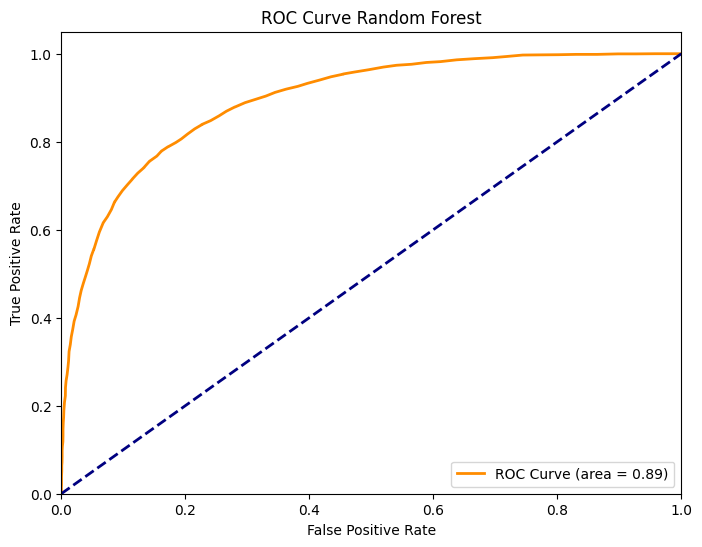

In [217]:
fpr, tpr, thresholds = roc_curve(y_test_encoded, positive_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc='lower right')
plt.show()


This code is used to visualize the ROC curve (Receiver Operating Characteristic curve) and calculate the AUC-ROC score for a binary classification model.

First the true positive and false positive rates are calculated for the classes predicted by the model, and then these quantities are used to calculate the Area Under the Curve (AUC) using false positive rates (fpr) and true positive rates (tpr).

###Block 3 (Optional)

####Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_encoded, y_train_encoded)
print("Default parameters of Gradient Boosting:")
print(gb_clf.get_params())

Default parameters of Gradient Boosting:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
positive_probs = gb_clf.predict_proba(X_test_encoded)[:, 1]

auc_rocGB = roc_auc_score(y_test_encoded, positive_probs)
print("AUC-ROC Score Gradiet Boosting:", auc_rocGB)

AUC-ROC Score Gradiet Boosting: 0.7471331955916692


In [ ]:
predictions = gb_clf.predict(X_test_encoded)

conf_matrix = confusion_matrix(y_test_encoded, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.2595505617977528
Specificity (True Negative Rate): 0.9611088950937375


In [ ]:
predictions = gb_clf.predict(X_test_encoded)

accuracyGB = accuracy_score(y_test_encoded, predictions)
print(f'Accuracy of model: {accuracyGB}')


precisionGB = precision_score(y_test, predictions, average=None)
recallGB = recall_score(y_test, predictions, average=None)
f1GB = f1_score(y_test, predictions, average=None)

print(f'Precision: {precisionGB}')
print(f'Recall: {recallGB}')
print(f'F1-score: {f1GB}')

class_names = ["Negative", "Positive"]
print(classification_report(y_test, predictions, target_names=class_names))

Accuracy of model: 0.7173347214992192
Precision: [0.70909358 0.78040541]
Recall: [0.9611089  0.25955056]
F1-score: [0.81608806 0.38954469]
              precision    recall  f1-score   support

    Negative       0.71      0.96      0.82      5014
    Positive       0.78      0.26      0.39      2670

    accuracy                           0.72      7684
   macro avg       0.74      0.61      0.60      7684
weighted avg       0.73      0.72      0.67      7684



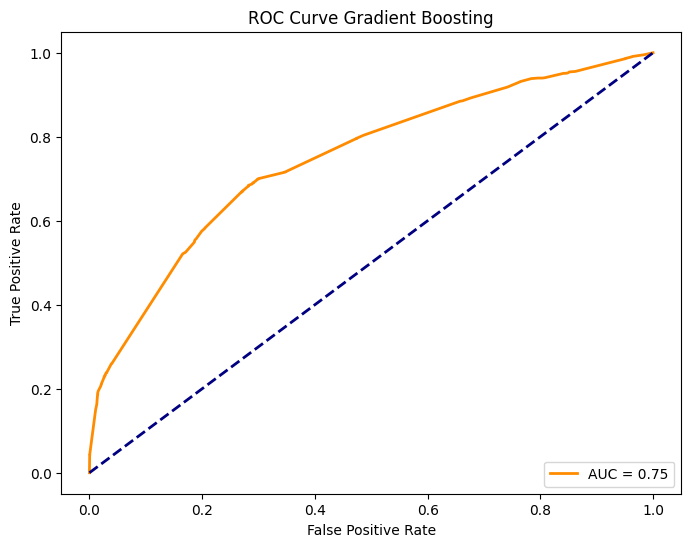

In [ ]:
probabilities = gb_clf.decision_function(X_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test_encoded, probabilities)
auc = roc_auc_score(y_test_encoded, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


####SVM

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_encoded, y_train_encoded)

print("Default parameters of SVM Classifier:")
print(svm_classifier.get_params())

In [ ]:
positive_probs = svm_classifier.predict_proba(X_test_encoded)[:, 1]

auc_rocSVM = roc_auc_score(y_test_encoded, positive_probs)
print("AUC-ROC Score SVM:", auc_roc)

AUC-ROC Score: 0.7281308590627891


In [ ]:
predictions = svm_classifier.predict(X_test_encoded)

conf_matrix = confusion_matrix(y_test_encoded, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.45131086142322097
Specificity (True Negative Rate): 0.8717590745911448


In [ ]:
predictions = svm_classifier.predict(X_test_encoded)

accuracySVM = accuracy_score(y_test_encoded, predictions)
print(f'Accuracy of model: {accuracySVM}')


precisionSVM = precision_score(y_test, predictions, average=None)
recallSVM = recall_score(y_test, predictions, average=None)
f1SVM = f1_score(y_test, predictions, average=None)

print(f'Precision: {precisionSVM}')
print(f'Recall: {recallSVM}')
print(f'F1-score: {f1SVM}')

class_names = ["Negative", "Positive"]
print(classification_report(y_test, predictions, target_names=class_names))



Accuracy of model: 0.7256637168141593
Precision: [0.7489719  0.65205628]
Recall: [0.87175907 0.45131086]
F1-score: [0.80571429 0.53342187]
              precision    recall  f1-score   support

    Negative       0.75      0.87      0.81      5014
    Positive       0.65      0.45      0.53      2670

    accuracy                           0.73      7684
   macro avg       0.70      0.66      0.67      7684
weighted avg       0.72      0.73      0.71      7684



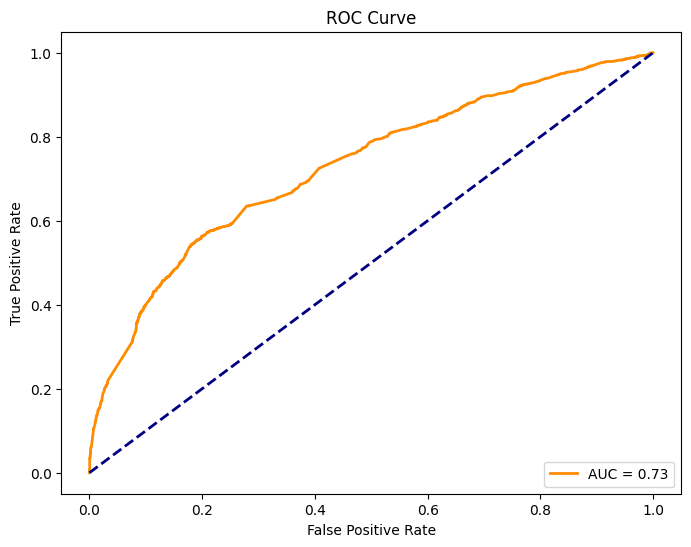

In [ ]:
probabilities = svm_classifier.decision_function(X_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test_encoded, probabilities)
auc = roc_auc_score(y_test_encoded, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



####Results

In [ ]:
res = {
    'Models': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine'],
    'Accuracy': [accuracyRF, accuracyGB, accuracySVM],
    'AUC-ROC-Score': [auc_rocRF, auc_rocGB, auc_rocSVM],

}


results = pd.DataFrame(res)
display(HTML(results.to_html(index=False)))

NameError: ignored